### **공부 주제**
* **통계 분석**
    * 이유: adsp 자격증 취득 후 이론으로만 공부했던 통계 개념들을 코드에 적용해볼 필요성을 느끼게 됨
* **함수 및 클래스**
    * 아직 사용이 익숙하지 않은 두 method를 연습해 볼 필요성을 느끼게 됨

**1) 통계 분석:**

* `t-test, chi-square test`
    * 가설 검증하기(연속형, 범주형 데이터의 구분) 
* 자유도 개념(이해가 부족함)
    * 이해를 더하기 위한 이론 공부와 코드 실습

**1) 통계 분석 - 귀무 가설과 대립 가설**

* 귀무 가설(Null hypothesis): 모집단의 특성에 대해 옳다고 제안하는 잠정적인 주장
    * 예) "모집단의 모수는 OO와 차이가 없다."
    * 예) "광고에 노출된 집단은 광고 접속 횟수에서 노출되지 않은 집단과 차이가 없다"

* 대립 가설(Alternative hypothesis): 귀무가설이 거짓이라면 대안적으로 참이되는 가설
    * 예) "광고에 많이 노출될 수록 해당 웹사이트에 많이 접속한다."

* 주장하고자 하는 대립 가설의 통계적 유의미성을 검증하기 위해 p-value 사용
* 대립 가설을 채택할 수 있는 기준은 p값이 0.05(5%)미만일 때 가능하다. 
    * ###### 어떤 사건이 우연히 발생할 확률이 5%보다 낮을 가능성은 거의 없으며, 만약 발생했다면 그 사건이 통계적으로 유의미했기 때문에 일어났다고 해석

#### 본격적인 가설 검정
* 가설 검정을 위한 도구로써 T-test, Chi-squared test, Z-test등이 있다. 

**1) T-test**

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = sns.load_dataset("penguins")
df = df.dropna()
df.head(10)

# df = df.rename(columns = {"spices": "spicies", "island" : "island", 
# "bill_depth_mm":"bill_length", "bill_depth":"bill_depth",
#  "filpper_length_mm":"filpper_length", "body_mass_g":"body_mass", "sex" : "sex"})

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,Female
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,Male
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,Male


penguins 데이터셋은 아래와 같은 정보를 담고 있다.

* species : 펭귄의 종 (Adelie, Chinstrap, Gentoo)
* island: 살고 있는 섬 이름 (Torgersen, Dream, Biscoe)
* bill_length: 부리의 길이 (단위: mm)
* bill_depth: 부리의 깊이 (단위: mm)
* flipper_length: 플리퍼(≒ 날개)의 길이 (단위: mm)
* body_mass: 체질량 (단위: g)
* sex: 성별 (MALE, FEMALE)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [134]:
df['species'].value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

**결측치 시각화**

In [10]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

<AxesSubplot:>

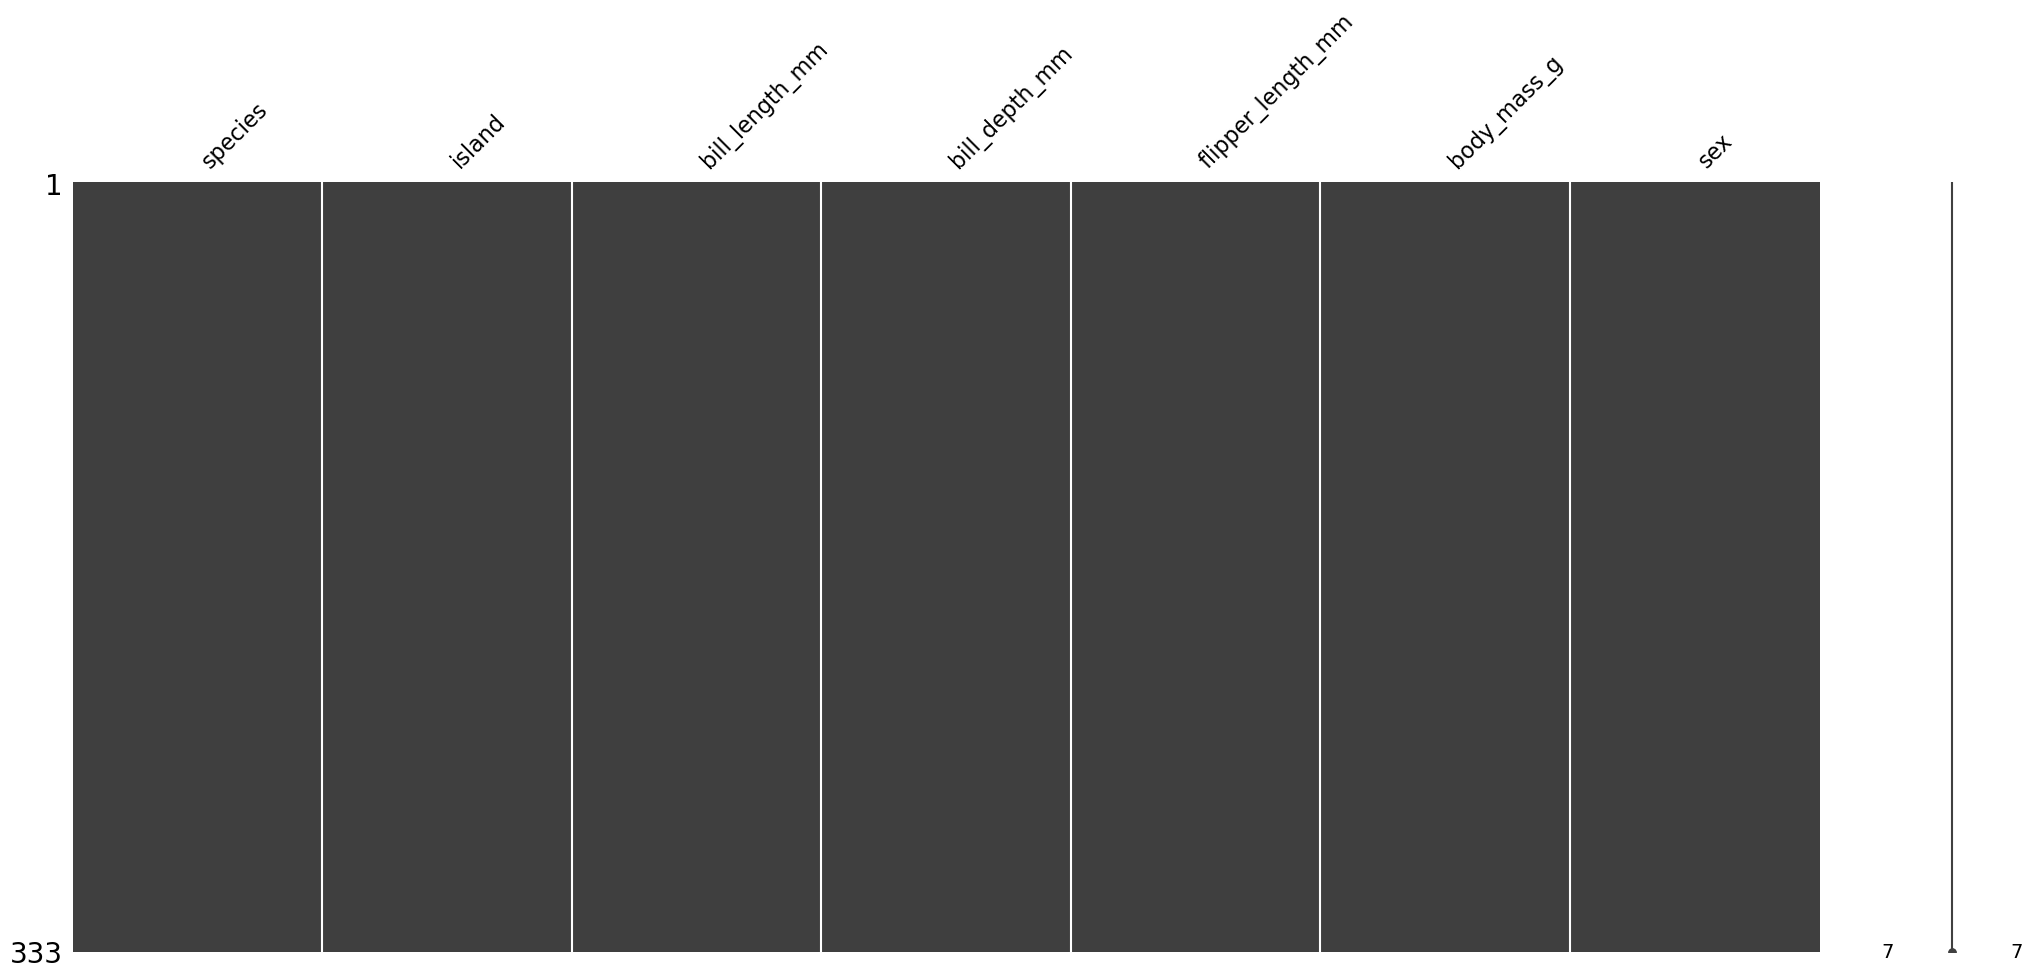

In [45]:
import missingno as mino
mino.matrix(df)

**가설: Adelie 펭귄은 키가 약 70cm까지 자란다고 한다. 그렇다면 70cm까지 자란 개체의 몸무게는 6kg 이상일 것이다.**

* 평균 수치(4.2kg)이상, 최대 수치(6.3kg)이하의 범위 안에 속할 것 

    * 귀무가설: Adelie 펭귄의 평균 몸무게는 6kg일 것이다.
    * 대립가설: Adelie 펭귄의 평균 몸무게는 6kg이 아닐 것이다.
    * 신뢰도: 95%

In [20]:
df['body_mass_g'].describe()

count     342.000000
mean     4201.754386
std       801.954536
min      2700.000000
25%      3550.000000
50%      4050.000000
75%      4750.000000
max      6300.000000
Name: body_mass_g, dtype: float64

In [43]:
df['body_mass_g'].fillna(method = "ffill", inplace = True)

In [28]:
adelie = df[df['species'] == 'Adelie']['body_mass_g']
stats.ttest_1samp(adelie, 6000) # 체중 단위: g

Ttest_1sampResult(statistic=-61.907109186716326, pvalue=3.257306109610503e-109)

**two sample T-test**
* 두 표본집단의 평균을 비교할 때 사용한다. 
* 가설: Adeile 펭귄은 Gentoo 펭귄 속의 펭귄 종이라고 한다. 그렇다면 두 종의 펭귄의 생김새가 비슷하지 않을까? 
* 생김새의 측도라고 할 수 있는 평균 부리의 깊이가 같을 것이다. 

In [46]:
adelie = df[df['species'] == 'Adelie']['bill_depth_mm']
gentoo = df[df['species'] == 'Gentoo']['bill_depth_mm']

stats.ttest_ind(adelie, gentoo)

Ttest_indResult(statistic=24.208855744860315, pvalue=6.91055572279657e-69)

**p-value가 0.05 미만이므로 통계적으로 유의미하다고 볼 수 있다.**

In [57]:
print("Adelie 종의 평균 부리 깊이:",np.round(adelie.mean(), 2))
print("Gentoo 종의 평균 부리 깊이:",np.round(gentoo.mean(), 2))

Adelie 종의 평균 부리 깊이: 18.35
Gentoo 종의 평균 부리 깊이: 15.0


정확한 평균 값을 비교해보면 adelie종은 18.35mm, gentoo종은 15mm로 차이가 있다. 하지만 평균 값의 완전한 일치 여부가 아니라 두 값 사이에 통계적으로 유의미한 차이가 있는 지를 확인하는 절차이기 때문에 두 평균 값은 같다고 봐도 무방하다.  

In [47]:
adelie = df[df['species'] == 'Adelie']['bill_depth_mm']
Chinstrap = df[df['species'] == 'Chinstrap']['bill_depth_mm']

stats.ttest_ind(adelie, Chinstrap)

Ttest_indResult(statistic=-0.41849509118137584, pvalue=0.6760088132938111)

**Chi-squared test (카이제곱 검정)**
* Chi-squared test는 표본집단의 분포를 비교할 때 선택하는 방법이다. 
* Chi-squared test는 범주형(Categorical data)에 대해서만 사용이 가능하다.

**one sample Chi-squared test**
* 귀무가설: 펭귄의 성비는 1:1일 것이다.
* 대립가설: 펭귄의 성비는 1:1이 아닐 것이다.
* 신뢰도: 95%

In [68]:
male = df['sex'].value_counts()['Male']
female = df['sex'].value_counts()['Female']
exp = len(df) / 2 
'''
f_exp = [exp, exp]는 'Male'과 'Female' 두 범주에 대한 기대값을 
각각 전체 데이터 수의 절반으로 설정한다는 것을 의미.
위 가설에 따라 데이터를 1:1 비율에 해당하도록 나누기 위함.
'''
stats.chisquare(f_obs=[male, female], f_exp = [exp, exp])

Power_divergenceResult(statistic=0.02702702702702703, pvalue=0.8694170607412391)

**two sample Chi-squared test**
귀무가설: 

* 귀무가설: 펭귄의 몸무게와 플리퍼 길이는 연관이 없다.
* 대립가설: 펭귄의 몸무게와 플리퍼 길이는 연관이 있다.
* 신뢰도: 95%

몸무게와 플리퍼 길이를 각각 세 그룹으로 나누고, 그 결과를 crosstab으로 제작, 펭귄의 몸무게와 플리퍼 길이에 대해서 two sample Chi-squared test를 시행

In [71]:
# 'body_mass_g'와 'flipper_length 열의 값을 동일한 간격의 3개 구간으로 나누고,
#  각 값이 속한 구간을 카테고리형 데이터로 변환하는 작업을 수행

mass_cut = pd.cut(df['body_mass_g'], 3).astype('category')
flipper_cut = pd.cut(df["flipper_length_mm"], 3).astype("category")
    
data = pd.crosstab(mass_cut, flipper_cut)
data.columns = ['Short', 'Middle', 'Long']
data.index = ['Light','Middle','Heavy']

In [73]:
data # 각 셀은 두 범주형 변수의 교차 빈도를 나타냄.

,Short,Middle,Long
Light,95,55,0
Middle,13,74,41
Heavy,0,2,53


In [74]:
chi, pvalue, _, _ = stats.chi2_contingency(data, correction=True)
chi, pvalue
# chi2_contingency(): 두 변수간의 독립성 검정을 수행
    # correction = 기본값은 False, 보정이 들어간 검정 수행 여부를 결정
    # 보정은 표본의 크기가 작을 때 수행하는 것이 적절함. 

# p-value가 0.05보다 작기 때문에 귀무가설을 기각하고 대립가설을 채택한다. 
# 따라서 펭귄의 몸무게와 플리퍼 길이는 연관이 있다

(244.23390701043138, 1.1365768507791132e-51)

**T-test와 Chi-square test를 class로 구현**

In [103]:
import numpy as np
from scipy.stats import t

class TTest:
    def __init__(self, sample1, sample2):
        # 비교하고자 하는 두 표본을 클래스 속성으로 저장
        self.sample1 = np.array(sample1)
        self.sample2 = np.array(sample2)
        
    def calculate_t_statistic(self): # t-통계량을 계산하는 역할
        mean1, mean2 = np.mean(self.sample1), np.mean(self.sample2) # 각 표본의 평균
        std1, std2 = np.std(self.sample1, ddof=1), np.std(self.sample2, ddof=1) 
        # 각 표본의 비편향 표준편차 게산
         # 비편향 표준편차: 모집단의 표준편차에 대한 추정치(데이터의 변량의 정확한 측정치를 제공)
            # -> 표본 표준편차와 모집단 표준편차간의 차이를 보완
         # 표준편차를 사용하면 표본의 크기에 따라 편향된 추정치가 되고 모집단의 표준편차를 과소평가할 수 있음.
            # ddof 매개변수: 자유도에서 감소할 값 지정(표본 표준편차의 경우 1로 지정)
        
        n1, n2 = len(self.sample1), len(self.sample2) # 각각의 표본 크기
        
        # 풀드(pooled) 표준편차 수식
         # 두 표본의 정보를 통합하여 모집단의 표준편차를 추정
        pooled_std = np.sqrt(((n1-1)*std1**2 + (n2-1)*std2**2) / (n1 + n2 - 2))
        
        # T-통계량 계산
        t_statistic = (mean1 - mean2) / (pooled_std * np.sqrt(1/n1 + 1/n2))
        
        return t_statistic

    # 두 표본의 평균 차이를 표준 오차로 나누기
    def perform_t_test(self, alpha=0.05, alternative='two-sided'):
        t_statistic = self.calculate_t_statistic() 
        df = len(self.sample1) + len(self.sample2) - 2 # 통계량의 자유도 계산, 자유도는 두 표본의 크기에서 2를 뺀 값.
        p_value = 2 * (1 - t.cdf(np.abs(t_statistic), df))
        # t.cdf(): t-분포의 누적 분포 함수 계산
            # 누적 분포 함수: 확률 변수가 특정 값보다 작거나 같을 확률 계산
        # np.abs(t_statistic): t-통계량의 절댓값을 취한 값
        # t-분포는 양쪽 꼬리에 대칭이므로 양쪽 영역을 고려하기 위해 절댓값을 사용
        # 정리: 양측 검정에서 귀무가설의 기각역에 들어갈 확률 계산, 양쪽 꼬리에 대한 확률을 고려하기 위해 절댓값 사용
        return t_statistic, p_value, result

class SuperTTest(TTest): # TTest 클래스를 상속
    def __init__(self, sample1, sample2, additional_data):
        super().__init__(sample1, sample2) # 부모 클래스의 __init__ 메소드 호출
        self.additional_data = additional_data
    
    def display_additional_data(self):
        print(f"Additional Data: {self.additional_data}")
    # 활용 예시: 통계 결과 해석 
    def interpret_results(self):
            t_stat, p_val, result = self.perform_t_test()
            self.display_additional_data()
            
            if p_val < 0.05:
                print("The difference is statistically significant.")
            else:
                print("No significant difference observed.")

# Example usage:
sample1 = adelie
sample2 = gentoo
additional_data = "Stastical significance"

super_t_test_instance = SuperTTest(sample1, sample2, additional_data)
super_t_test_instance.interpret_results()

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")



Additional Data: Stastical significance
The difference is statistically significant.
T-statistic: 24.208855744860315
P-value: 0.0


**pooled 표준편차 수식**

$$pooled variance=\frac{(n1−1)⋅var1+(n2−1)⋅var2}{n1+n2−2}$$

$var1, var2$: 각 표본의 비편향 표분 분산


**t-통계량 계산 수식**

$$tstatistic​=\frac{mean1​−mean2​​}{pooled\_std×n1​1​+n2​1​​}
$$

$pooled\_std$: 등분산 가정 하에서 두 표본의 표준편차의 가중평균

In [ ]:
mass_cut = pd.cut(df['body_mass_g'], 3).astype('category')
flipper_cut = pd.cut(df["flipper_length_mm"], 3).astype("category")
    
data = pd.crosstab(mass_cut, flipper_cut)
data.columns = ['Short', 'Middle', 'Long']
data.index = ['Light','Middle','Heavy']

In [115]:
chi, pvalue, _, _ = stats.chi2_contingency(data, correction=True)
chi, pvalue

(244.23390701043138, 1.1365768507791132e-51)

**카이제곱 검정 class** 

In [132]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

class ChiSquareTest: # 카이제곱 검정 수행 클래스 정의
    def __init__(self, observed): # observed: 검정을 수행할 실제 관측 데이터
        self.observed = np.array(observed) # 연산을 위해 array로 변환
    
    def perform_chi_square_test(self, alpha=0.05): #alpha=0.05: 유의수준으로 기본값은 0.05로 설정
        row_totals = np.sum(self.observed, axis=1)  
        col_totals = np.sum(self.observed, axis=0)  
        total = np.sum(self.observed) 

        expected = np.outer(row_totals, col_totals) / total

        # 카이제곱 통계량 계산
            # 관측된 빈도와 기대 빈도간의 차이 제곱
            # 기대 빈도로 나누어 모든 셀에서 얻은 값 합산
        chi2 = np.sum((self.observed - expected)**2 / expected)

        # 자유도 계산
            # (행의 수 - 1) * (열의 수 - 1)
        dof = (self.observed.shape[0] - 1) * (self.observed.shape[1] - 1)

        # 누적 분포 함수 활용, 카이제곱 통계량에 대한 p-value를 계산.
        p_value = 1 - stats.chi2.cdf(chi2, dof)

        result = {
            'Chi-Square Statistic': chi2,
            'P-value': p_value,
            'Degrees of Freedom': dof,            
        }

        return result

# 위의 카이제곱 함수 사용 예제와 동일
 # 데이터를 3개의 구간으로 나누고 교차 빈도 테이블 생성 -> 입력 데이터로 사용
mass_cut = pd.cut(df['body_mass_g'], 3)
flipper_cut = pd.cut(df["flipper_length_mm"], 3)
    
data = pd.crosstab(mass_cut, flipper_cut)
data.columns = ['Short', 'Middle', 'Long']
data.index = ['Light', 'Middle', 'Heavy']

# Transpose the data to get the expected format for the ChiSquareTest
observed_data = data.T.values

chi_square_test_instance = ChiSquareTest(observed_data)
result = chi_square_test_instance.perform_chi_square_test()

print("Chi-Square Test Result:")
for key, value in result.items():
    print(f"{key}: {value}")


Chi-Square Test Result:
Chi-Square Statistic: 244.23390701043144
P-value: 0.0
Degrees of Freedom: 4
